## Imports

In [54]:
import re
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/surajkarki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/surajkarki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the data

The dataset we are using is ‘The Hewlett Foundation: Automated Essay Scoring Dataset’ by ASAP. You can find in the below link. 
 
https://www.kaggle.com/c/asap-aes/data 

In [55]:
df = pd.read_csv("./Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [58]:
df.shape

(12976, 28)

In [59]:
df.isnull().sum() # No. of null presented in each column

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [60]:
df[df['essay_set']==7]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
10684,17834,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10685,17836,7,"I am not a patience person, like I cant sit i...",6,7,NaN,13,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10686,17837,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10687,17838,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,17839,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,19558,7,One time I was getting a cool @CAPS1 game it w...,6,6,NaN,12,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12249,19559,7,A patent person in my life is my mom. Aicason ...,9,7,NaN,16,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12250,19561,7,A time when someone else I know was patient wa...,11,8,NaN,19,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12251,19562,7,I hate weddings. I love when people get marrie...,12,10,NaN,22,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove all NaN values

In [61]:
df.dropna(axis=1,inplace=True)

In [62]:
df.shape

(12976, 6)

In [63]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [64]:
df['essay_set'].value_counts()

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: count, dtype: int64

In [65]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [66]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [67]:
min(df['domain1_score'])

0

In [68]:
max(df['domain1_score'])

60

Skewness of our data

In [69]:
df['domain1_score'].skew()

2.475880706764125

In [70]:
df['domain1_score'].kurtosis()

6.077898703389378

#### Check Skewness

/home/surajkarki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


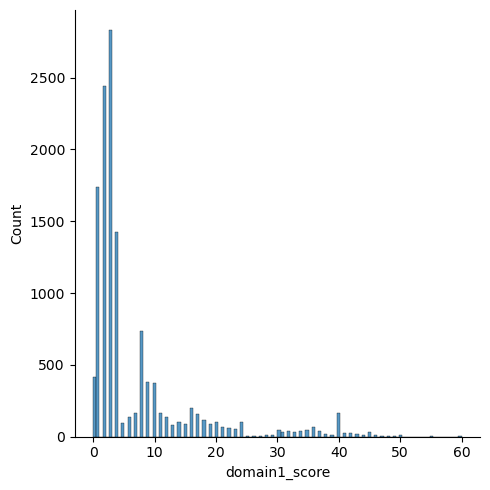

In [71]:
sns.displot(df['domain1_score'])

As we can see, most domain scores lie between 2 and 2.5.

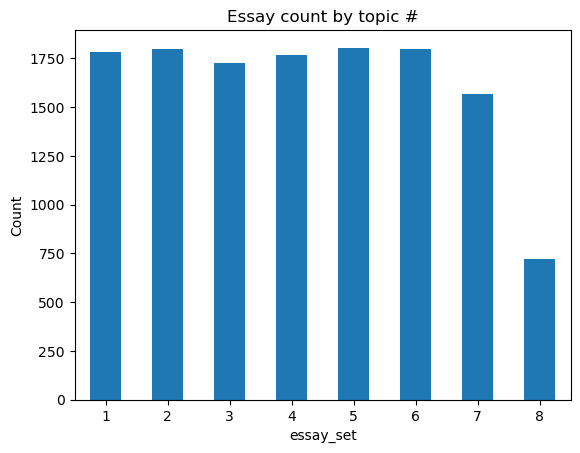

In [72]:
df.groupby('essay_set').agg('count').plot.bar(y='essay', rot=0, legend=False)
plt.title('Essay count by topic #')
plt.ylabel('Count')
plt.show()

Since essay set 8 has the fewest essays and the most distinct scores, it might prove to be the most challenging topic to model.

#### Count characters and words for each essay

In [73]:
df['word_count'] = df['essay'].str.strip().str.split().str.len()

In [74]:
df.head()

,essay_id,essay_set,essay,domain1_score,word_count
0,1,1,"Dear local newspaper, I think effects computer...",8,338
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,419
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,279
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,524
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,465


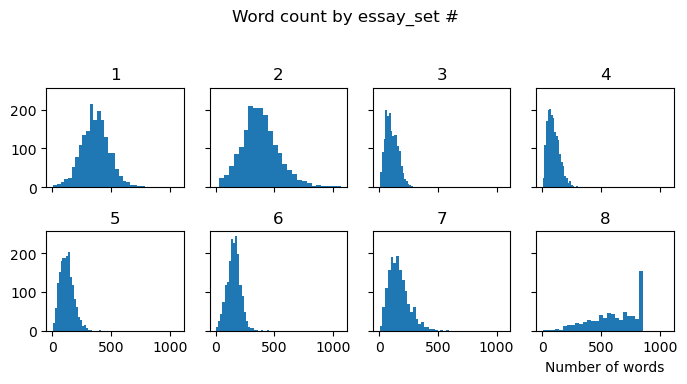

In [75]:
df.hist(column='word_count', by='essay_set', bins=25, sharey=True, sharex=True, layout=(2, 4), figsize=(7,4), rot=0) 
plt.suptitle('Word count by essay_set #')
plt.xlabel('Number of words')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

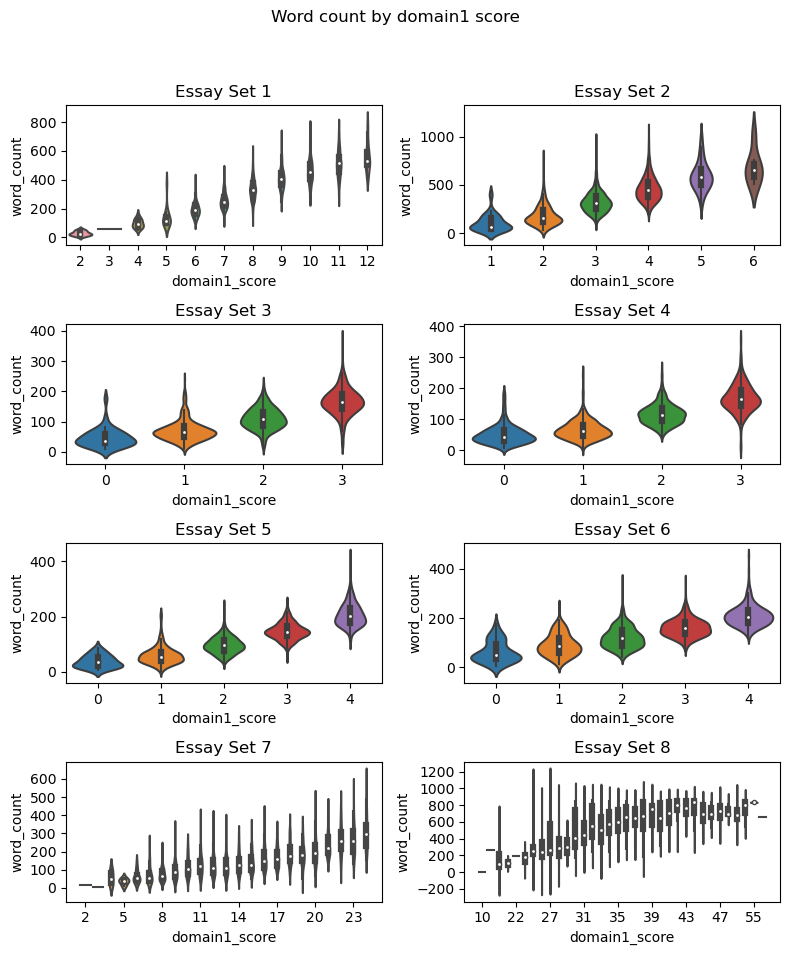

In [76]:
essay_set = 0
fig, ax = plt.subplots(4,2, figsize=(8,10))
for i in range(4):
    for j in range(2):
        essay_set += 1
        sns.violinplot(x='domain1_score', y='word_count', data=df[df['essay_set'] == essay_set], ax=ax[i,j])
        ax[i,j].set_title('Essay Set %i' % essay_set)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Word count by domain1 score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can see a reasonable correlation between word count and domain1 score for all but essay set 8, where the word count apparently reaches a maximum at the upper third of the scores.

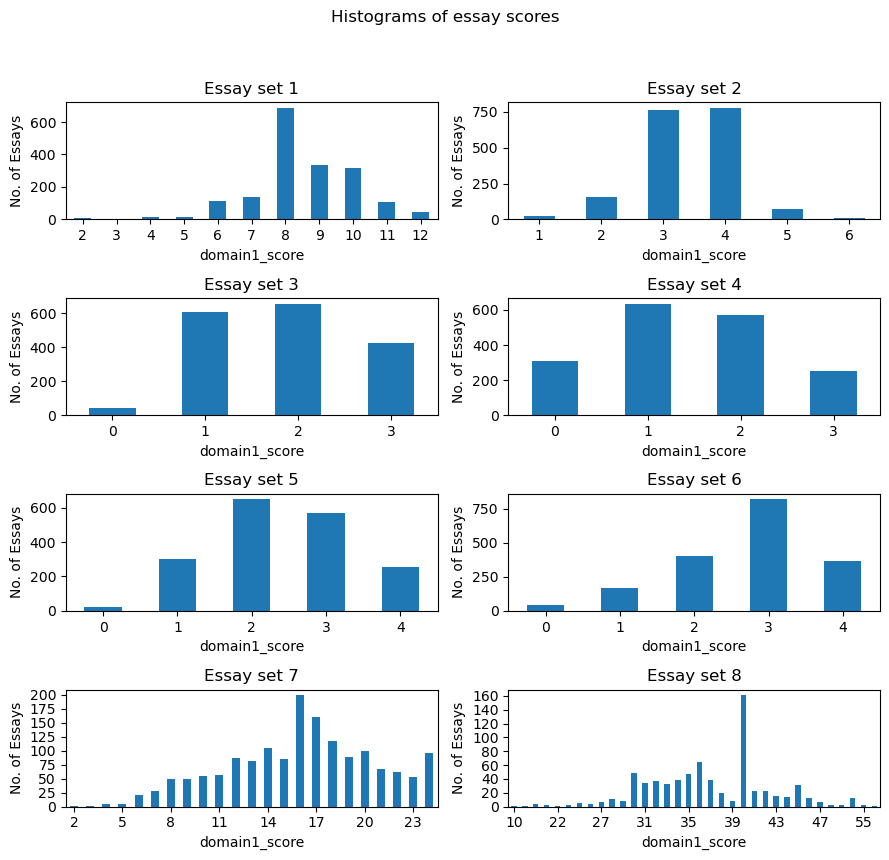

In [77]:
essay_set = 0
fig, ax = plt.subplots(4,2, figsize=(9,9), sharey=False)
for i in range(4):
    for j in range(2):
        essay_set += 1
        df[df['essay_set'] == essay_set]\
            .groupby('domain1_score')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0)
        ax[i,j].set_title('Essay set %i' % essay_set)
        ax[i,j].set_ylabel("No. of Essays")
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Histograms of essay scores')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Many scores are underrepresented. Classification could be difficult without rebalancing.

#### Check range of domain1 score for each essay set

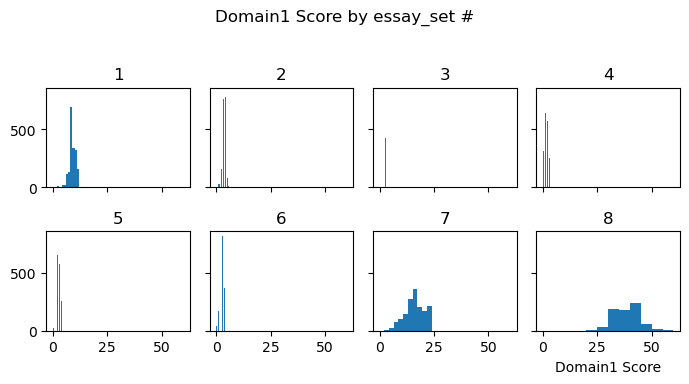

In [78]:
df.hist(column='domain1_score', by='essay_set', bins=10, sharey=True, sharex=True, layout=(2, 4), figsize=(7,4), rot=0) 
plt.suptitle('Domain1 Score by essay_set #')
plt.xlabel('Domain1 Score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [79]:
df.groupby(['essay_set'])['domain1_score'].agg(['min','max','count','nunique'])

,min,max,count,nunique
essay_set,,,,
1,2,12,1783,11
2,1,6,1800,6
3,0,3,1726,4
4,0,3,1770,4
5,0,4,1805,5
6,0,4,1800,5
7,2,24,1569,23
8,10,60,723,34


Let's normalize the data to minimize the skewness.

In [80]:
min_range = [2,1,0,0,0,0,2,10] # Different minimum ranges of different essay set
max_range = [12,6,3,3,4,4,24,60] # Different maximum ranges of different essay set

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [81]:
df.head()

,essay_id,essay_set,essay,domain1_score,word_count,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,338,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,419,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,279,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,524,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,465,6


/home/surajkarki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


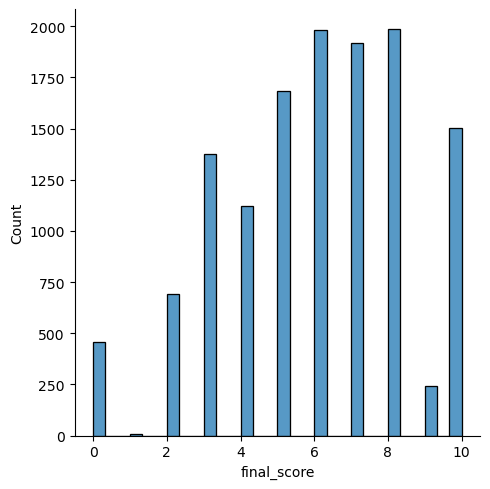

In [82]:
sns.displot(df['final_score'])

In [83]:
df["final_score"].skew()

-0.2527301333568229

In [84]:
df.describe()

,essay_id,essay_set,domain1_score,word_count,final_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,222.708154,5.924091
std,6309.074105,2.136913,8.970705,175.919826,2.519079
min,1.000000,1.000000,0.000000,2.000000,0.000000
25%,4438.750000,2.000000,2.000000,98.000000,4.000000
50%,10044.500000,4.000000,3.000000,163.000000,6.000000
75%,15681.250000,6.000000,8.000000,307.000000,8.000000
max,21633.000000,8.000000,60.000000,1064.000000,10.000000


In [85]:
df.drop('domain1_score',axis=1,inplace=True)

In [88]:
df.head()

,essay_id,essay_set,essay,word_count,final_score
0,1,1,"Dear local newspaper, I think effects computer...",338,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",279,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",524,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",465,6


In [89]:
df.to_csv("./Dataset/processed_dataset_1.csv")